Oppgave 1
=========

A
---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

B
----

In [2]:
rådata = pd.read_csv("data.csv",index_col=0)

C
---

In [3]:
rådata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB

D
---

In [4]:
print(rådata["InvoiceDate"])
rådata["InvoiceDate"] = pd.to_datetime(
rådata["InvoiceDate"], format="%m/%d/%Y %H:%M"
)
print(rådata.info())

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 541909, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object

Her henter koden kolonnen "InvoiceDate" og konverterer den til et standard dato format i form av en  dato-type.

E
---
For å regne ut totalprisen må vi ta pris per enhet og gange det med antall enheter.

In [5]:
antall_produkt = rådata["Quantity"]
pris_per_enhet = rådata["UnitPrice"]
salgspris = antall_produkt*pris_per_enhet

F
----

In [6]:
rådata["Salgspris"] = salgspris

G
---

In [7]:
rådata.set_index('InvoiceDate',inplace=True)
print(rådata)

InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2010-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...                       ...       ...                                  ...   
2011-12-09 12:50:00    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
2011-12-09 12:50:00    581587     22899         CHILDREN'S APRON DOLLY GIRL    
2011-12-09 12:50:00    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
2011-12-09 12:50:00    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
2011-12-09 12:50:00    581587     22138        BAKING SET 9 

Dette kallet gjør "InvoiceDate" til en id som vi sorterer etter id istedet for en int. Vet du hva "RED WOOLLY HOTTIE WHITE HEART" er? [Se i rådata 2010-12-01 08:26:00 nr 5 (nr 4 hvis indeks[0] = 0)]

H
---

In [8]:
månedsgrupper = rådata["Salgspris"].groupby(pd.Grouper(freq="M"))
månedssalg = månedsgrupper.sum()
dagsgrupper = rådata["Salgspris"].groupby(pd.Grouper(freq="D"))
dagssalg = dagsgrupper.sum()
print(månedssalg.head())
print(dagssalg.head())

InvoiceDate
2010-12-31    748957.020
2011-01-31    560000.260
2011-02-28    498062.650
2011-03-31    683267.080
2011-04-30    493207.121
Freq: M, Name: Salgspris, dtype: float64
InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-04        0.00
2010-12-05    31383.95
Freq: D, Name: Salgspris, dtype: float64


Månedssalg viser totalen per måned mens dagssalg viser per dag. Dette kan vi se på indeksene som viser dato.

Oppgave 2
=========
A
---

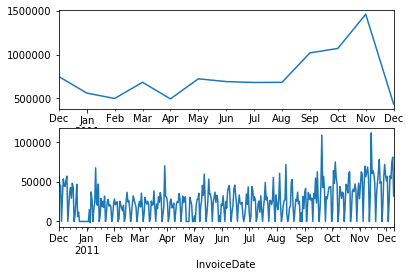

In [9]:
linjeplot_figur = plt.figure()
månedssalg_akser = linjeplot_figur.add_subplot(2, 1, 1)
dagssalg_akser = linjeplot_figur.add_subplot(2, 1, 2)
# Linja over sier at vi ønsker to rader og en kolonne med akser
# Så ber den om første settet med akser (det øverste)
månedssalg.plot(ax=månedssalg_akser)
dagssalg.plot(ax=dagssalg_akser)

B
---

In [10]:
plt.tight_layout()
# Linja over forteller matplotlib at det er trangt
# så vi må gjøre aksene våre mindre enn normalt.
plt.show()

<Figure size 432x288 with 0 Axes>

Vi kan se på dagssalg at vi har noen dager som ikke har noe salg i det heletatt. Disse gapene ser veldig frekvente ut.

Oppgave 3
=========
A
---

In [11]:
ukedag = rådata.index.weekday
ukedagsgrupper = rådata["Salgspris"].groupby(ukedag)
ukedagssalg = ukedagsgrupper.sum()
print("Salg per ukedag:")
print(ukedagssalg)
# Ukedag 0 er mandag, ukedag 6 er søndag

Salg per ukedag:
InvoiceDate
0    1588609.431
1    1966182.791
2    1734147.010
3    2112519.000
4    1540610.811
6     805678.891
Name: Salgspris, dtype: float64


Alle linjene gjør sitt beste. Ukedagssalg viser totalsummmen for hver dag mens Ukedagsgrupper grupperer dataen etter dag. 

B
---
Vi kan se at lørdag ikke har noen salg. Dette ser vi i oppgave 3a hvor indeks 5 mangler, noe som tilsvarer lørdag.

C
--
Vi vet vi mangler noen dager, spesifikt lørdag men vi later som vi ikke vet det. Dette betyr at vi har minst en søyle som ikke eksisterer. 
Vi løser dette ved å anta at salgene er i kronologisk rekkefølge, mandag til søndag. Derfor kan salg indeks 0 være mandag, indeks 1 være tirsdag, osv... dette bruker vi til vår fordel slik at det vi har data på blir representert. 

In [12]:
dag_navn = [
"Mandag", "Tirsdag", "Onsdag", "Torsdag",
"Fredag", "Lørdag", "Søndag"
]
ukedagsdata_dagnummer = ukedagssalg.index
ukedagssalg_dagnavn = [dag_navn[d] for d in ukedagsdata_dagnummer]
print(ukedagsdata_dagnummer)

Int64Index([0, 1, 2, 3, 4, 6], dtype='int64', name='InvoiceDate')


D
---

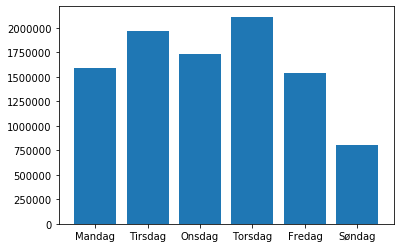

In [13]:
dager = plt.figure()
dager_ax = dager.add_subplot()
dager_ax.bar(ukedagssalg_dagnavn,ukedagssalg)
plt.show()